In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import sklearn
import xlrd

## Reading Data

In [2]:
df= pd.read_excel('finaldata.xlsx')

### Check For Missing Data 

In [3]:
print(df.isnull().sum().sort_values(ascending=False))

TSS                          155
The efficiency of TSS        154
The efficiency of cod        154
The efficiency of the bod    154
TDS                          154
BOD                          154
COD                          154
PH                           154
temp                         154
date                         154
stage                          0
dtype: int64


### Drop Rows with None Values 

In [4]:
df=df.dropna()
df

,date,stage,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod,The efficiency of cod,The efficiency of TSS
0,2018-03-01 00:00:00,influent,17.0,7.50,610.0,355.0,1460.0,310.0,0.72,0.75,0.76
1,17/1/2018,influent,14.5,7.80,530.0,275.0,1453.0,255.0,0.75,0.82,0.76
2,27/1/2018,influent,13.7,7.40,730.0,380.0,1813.0,320.0,0.82,0.85,0.80
3,2018-01-02 00:00:00,influent,14.0,6.90,675.0,385.0,1520.0,340.0,0.98,0.97,0.79
4,2018-08-02 00:00:00,influent,17.6,6.80,710.0,395.0,1593.0,350.0,0.80,0.86,0.83
5,14/2/2018,influent,13.8,6.90,610.0,390.0,1221.0,345.0,0.77,0.82,0.78
6,26/2/2018,influent,17.9,7.00,660.0,415.0,1730.0,372.0,0.70,0.68,0.74
7,2018-06-03 00:00:00,influent,17.2,6.60,650.0,410.0,1593.0,387.0,0.75,0.74,0.78
8,14/3/2018,influent,19.5,7.00,740.0,424.0,1580.0,382.0,0.72,0.76,0.75
9,20/3/2018,influent,19.0,7.00,725.0,430.0,1527.0,364.0,0.76,0.79,0.77


### Correct Index

In [5]:
df=df.reset_index(drop=True)
df=df[1:]
df

,date,stage,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod,The efficiency of cod,The efficiency of TSS
1,17/1/2018,influent,14.5,7.80,530.0,275.0,1453.0,255.0,0.75,0.82,0.76
2,27/1/2018,influent,13.7,7.40,730.0,380.0,1813.0,320.0,0.82,0.85,0.80
3,2018-01-02 00:00:00,influent,14.0,6.90,675.0,385.0,1520.0,340.0,0.98,0.97,0.79
4,2018-08-02 00:00:00,influent,17.6,6.80,710.0,395.0,1593.0,350.0,0.80,0.86,0.83
5,14/2/2018,influent,13.8,6.90,610.0,390.0,1221.0,345.0,0.77,0.82,0.78
6,26/2/2018,influent,17.9,7.00,660.0,415.0,1730.0,372.0,0.70,0.68,0.74
7,2018-06-03 00:00:00,influent,17.2,6.60,650.0,410.0,1593.0,387.0,0.75,0.74,0.78
8,14/3/2018,influent,19.5,7.00,740.0,424.0,1580.0,382.0,0.72,0.76,0.75
9,20/3/2018,influent,19.0,7.00,725.0,430.0,1527.0,364.0,0.76,0.79,0.77
10,25/3/2018,influent,19.8,6.03,845.0,570.0,1453.0,420.0,0.78,0.78,0.71


### Describe Your Data


In [6]:
df.describe()

,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod,The efficiency of cod,The efficiency of TSS
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,22.740179,7.033214,671.285714,386.321429,1237.535714,341.428571,0.796786,0.809196,0.776696
std,4.820386,0.498770,149.533715,84.062527,326.834336,110.710621,0.076420,0.071925,0.104850
min,13.700000,3.670000,60.000000,130.000000,111.000000,93.000000,0.460000,0.530000,0.250000
25%,18.175000,6.800000,610.000000,337.000000,1032.500000,250.000000,0.767500,0.780000,0.720000
50%,23.550000,7.100000,690.000000,390.000000,1236.000000,345.000000,0.800000,0.820000,0.790000
75%,27.050000,7.280000,752.500000,430.000000,1432.000000,406.000000,0.850000,0.852500,0.852500
max,34.000000,8.630000,1040.000000,570.000000,2330.000000,790.000000,0.980000,0.970000,0.940000


In [7]:
df['stage'].values

array(['influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influe

> All the Column has the same Value  so we will drop it

#### Drop Specific Columns

In [8]:
df=df.drop(['stage'], 1)
df

,date,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod,The efficiency of cod,The efficiency of TSS
1,17/1/2018,14.5,7.80,530.0,275.0,1453.0,255.0,0.75,0.82,0.76
2,27/1/2018,13.7,7.40,730.0,380.0,1813.0,320.0,0.82,0.85,0.80
3,2018-01-02 00:00:00,14.0,6.90,675.0,385.0,1520.0,340.0,0.98,0.97,0.79
4,2018-08-02 00:00:00,17.6,6.80,710.0,395.0,1593.0,350.0,0.80,0.86,0.83
5,14/2/2018,13.8,6.90,610.0,390.0,1221.0,345.0,0.77,0.82,0.78
6,26/2/2018,17.9,7.00,660.0,415.0,1730.0,372.0,0.70,0.68,0.74
7,2018-06-03 00:00:00,17.2,6.60,650.0,410.0,1593.0,387.0,0.75,0.74,0.78
8,14/3/2018,19.5,7.00,740.0,424.0,1580.0,382.0,0.72,0.76,0.75
9,20/3/2018,19.0,7.00,725.0,430.0,1527.0,364.0,0.76,0.79,0.77
10,25/3/2018,19.8,6.03,845.0,570.0,1453.0,420.0,0.78,0.78,0.71


## Seaborn Routine

### Heat Map

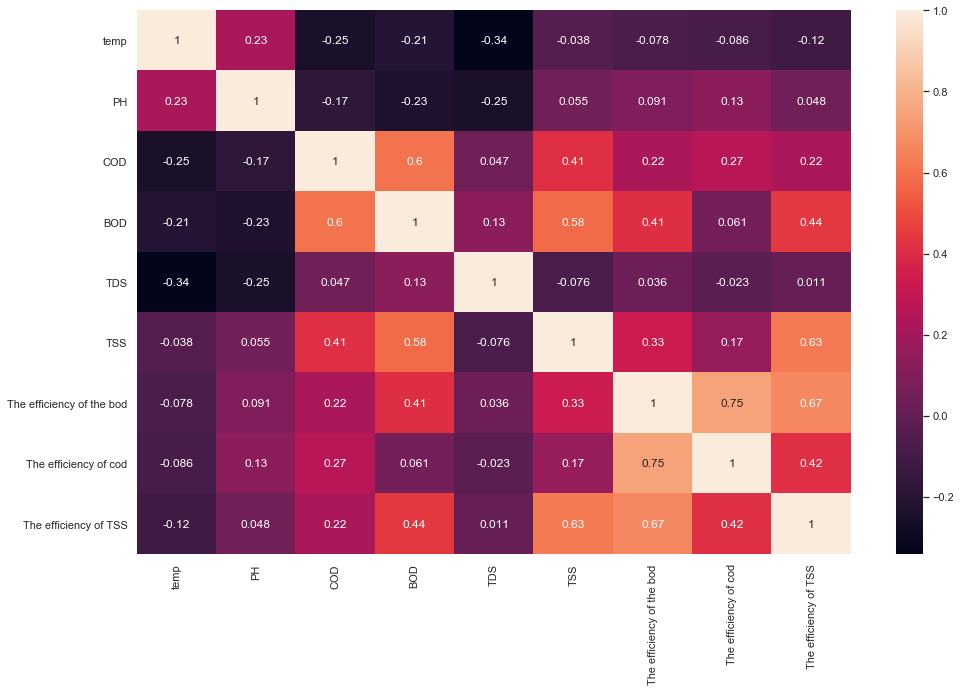

In [9]:
plt.figure(figsize = (16,10))
sns_plot=sns.heatmap(df.corr(),annot= True)
plt.show()

# The Efficiency of the Bod 

### Splitting Our Data

In [10]:
X=df.iloc[:,1:-3].values
y=df.iloc[:,-3:].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.1)

## Standardization

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
np.std(X_train)

1.0

## Build The Artificial Neural Network

In [13]:
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_dim = X.shape[1]))


model.add(Dense(3, activation = 'relu'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 1,283
Trainable params: 1,283
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])
history= model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size = 32, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 7/100
4/4 [============================

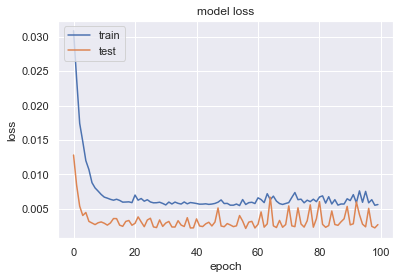

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027


[0.002709417836740613, 0.002709417836740613]

## Evaluation

In [18]:
### BOD
from sklearn.metrics import mean_squared_error ,r2_score
y_pred=model.predict(X_test)
MSE= mean_squared_error(y_test[:,0],y_pred[:,0])
r2=r2_score(y_test[:,0],y_pred[:,0])
RMSE=mean_squared_error(y_test[:,0],y_pred[:,0])**0.5
AAD= np.sum(((y_pred[:,0]-y_test[:,0])/y_pred[:,0])/len(y_test[:,0]))*100
print('--------------------------------')
print('BOD Results')
print('MSE :', MSE)
print('R2 :',r2)
print('RMSE :', RMSE)
print('AAD% :',AAD)


####### COD
MSE= mean_squared_error(y_test[:,1],y_pred[:,1])
r2=r2_score(y_test[:,1],y_pred[:,1])
RMSE=mean_squared_error(y_test[:,1],y_pred[:,1])**0.5
AAD= np.sum(((y_pred[:,1]-y_test[:,1])/y_pred[:,1])/len(y_test[:,1]))*100
print('--------------------------------')
print('COD Results')
print('MSE :', MSE)
print('R2 :',r2)
print('RMSE :', RMSE)
print('AAD% :',AAD)



####### TSS
MSE= mean_squared_error(y_test[:,2],y_pred[:,2])
r2=r2_score(y_test[:,2],y_pred[:,2])
RMSE=mean_squared_error(y_test[:,2],y_pred[:,2])**0.5
AAD= np.sum(((y_pred[:,2]-y_test[:,2])/y_pred[:,2])/len(y_test[:,2]))*100
print('--------------------------------')
print('TSS Results')
print('MSE :', MSE)
print('R2 :',r2)
print('RMSE :', RMSE)
print('AAD% :',AAD)

--------------------------------
BOD Results
MSE : 0.0035196913003170995
R2 : -1.158584102409125
RMSE : 0.05932698627367734
AAD% : -4.505804311140666
--------------------------------
COD Results
MSE : 0.001809244927668428
R2 : -0.039215275565431584
RMSE : 0.042535219849771884
AAD% : -1.9257390297414954
--------------------------------
TSS Results
MSE : 0.0027993176014918498
R2 : 0.4453746084000738
RMSE : 0.05290857776856083
AAD% : -1.1434210060863776


# BOD

In [19]:
err=abs(y_test[:,0]-y_pred[:,0])
Preds=pd.DataFrame(y_pred[:,0])
Actual=pd.DataFrame(y_test[:,0])

Error =pd.DataFrame(err)
Actual.reset_index(inplace=True)
Preds.reset_index(inplace=True)
Error.reset_index(inplace=True)
Result = pd.concat([Actual, Preds,Error], axis=1)

Result=Result.drop(['index'],1)
Result.columns=['Actual Bod','Predicted Bod', "Error"]
Result =Result.sort_values(by=['Actual Bod'])
Result=Result.reset_index(drop=True)
Result


,Actual Bod,Predicted Bod,Error
0,0.74,0.748930,0.008930
1,0.77,0.775470,0.005470
2,0.78,0.772213,0.007787
3,0.78,0.800623,0.020623
4,0.79,0.768913,0.021087
5,0.80,0.789119,0.010881
6,0.82,0.828245,0.008245
7,0.83,0.791044,0.038956
8,0.83,0.792881,0.037119
9,0.86,0.737127,0.122873


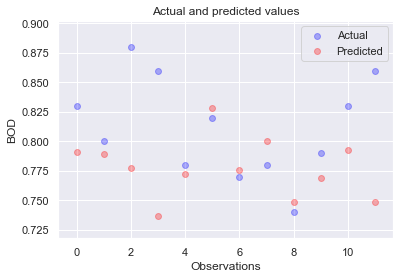

In [20]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
ax.scatter(x = range(0, y_test[:,0].size), y=y_test[:,0], c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred[:,0].size), y=y_pred[:,0], c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('BOD')
plt.legend()
plt.show()

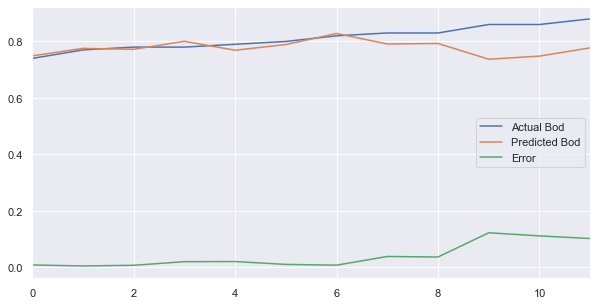

In [21]:
Result.plot(x=Result.index.name, y=['Actual Bod','Predicted Bod','Error'],figsize=(10,5), grid=True  )

# COD

In [22]:
err=abs(y_test[:,1]-y_pred[:,1])
Preds=pd.DataFrame(y_pred[:,1])
Actual=pd.DataFrame(y_test[:,1])

Error =pd.DataFrame(err)
Actual.reset_index(inplace=True)
Preds.reset_index(inplace=True)
Error.reset_index(inplace=True)
Result = pd.concat([Actual, Preds,Error], axis=1)

Result=Result.drop(['index'],1)
Result.columns=['Actual Cod','Predicted Cod', "Error"]
Result =Result.sort_values(by=['Actual Cod'])
Result=Result.reset_index(drop=True)
Result


,Actual Cod,Predicted Cod,Error
0,0.76,0.787897,0.027897
1,0.77,0.782753,0.012753
2,0.78,0.811322,0.031322
3,0.79,0.808440,0.018440
4,0.80,0.807544,0.007544
5,0.82,0.793519,0.026481
6,0.82,0.819927,0.000073
7,0.83,0.825765,0.004235
8,0.84,0.817873,0.022127
9,0.86,0.786949,0.073051


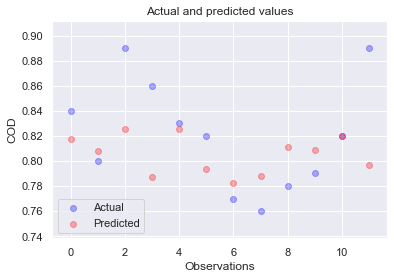

In [23]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
ax.scatter(x = range(0, y_test[:,1].size), y=y_test[:,1], c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred[:,1].size), y=y_pred[:,1], c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('COD')
plt.legend()
plt.show()

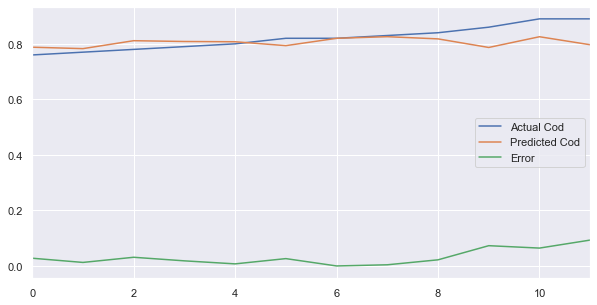

In [24]:
Result.plot(x=Result.index.name, y=['Actual Cod','Predicted Cod','Error'],figsize=(10,5), grid=True  )

# TSS

In [25]:
err=abs(y_test[:,2]-y_pred[:,2])
Preds=pd.DataFrame(y_pred[:,2])
Actual=pd.DataFrame(y_test[:,2])

Error =pd.DataFrame(err)
Actual.reset_index(inplace=True)
Preds.reset_index(inplace=True)
Error.reset_index(inplace=True)
Result = pd.concat([Actual, Preds,Error], axis=1)

Result=Result.drop(['index'],1)
Result.columns=['Actual TSS','Predicted TSS', "Error"]
Result =Result.sort_values(by=['Actual TSS'])
Result=Result.reset_index(drop=True)
Result


,Actual TSS,Predicted TSS,Error
0,0.68,0.640070,0.039930
1,0.70,0.721618,0.021618
2,0.70,0.752535,0.052535
3,0.70,0.734113,0.034113
4,0.71,0.776851,0.066851
5,0.79,0.801435,0.011435
6,0.82,0.777242,0.042758
7,0.83,0.815803,0.014197
8,0.83,0.818877,0.011123
9,0.84,0.855895,0.015895


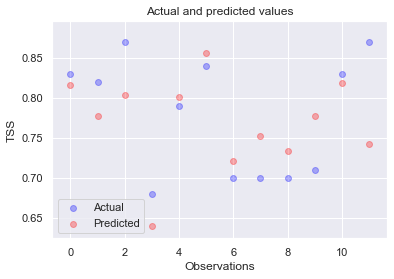

In [26]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
ax.scatter(x = range(0, y_test[:,2].size), y=y_test[:,2], c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred[:,2].size), y=y_pred[:,2], c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('TSS')
plt.legend()
plt.show()

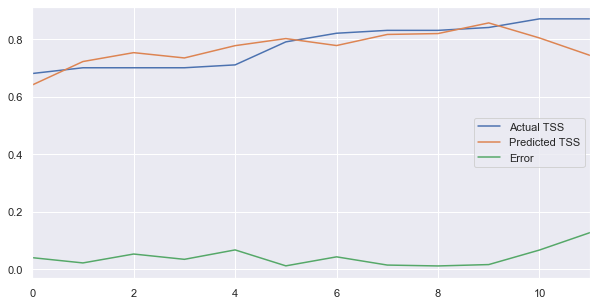

In [27]:
Result.plot(x=Result.index.name, y=['Actual TSS','Predicted TSS','Error'],figsize=(10,5), grid=True)